In [51]:
import numpy as np
import scipy.signal
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.interpolate
from scipy.interpolate import griddata
import copy

# The goal of the notebook is to apply interpolation & resampling techniques to reconstruct a signal which comes with outliers and missing points.
# Input are the original signal (with outliers and nan values) and the reconstructed signal (the one to get)



dict_keys(['__header__', '__version__', '__globals__', 'origS', 'origT', 'signal', 'time'])
2399 2399 3001 3001 1000.0


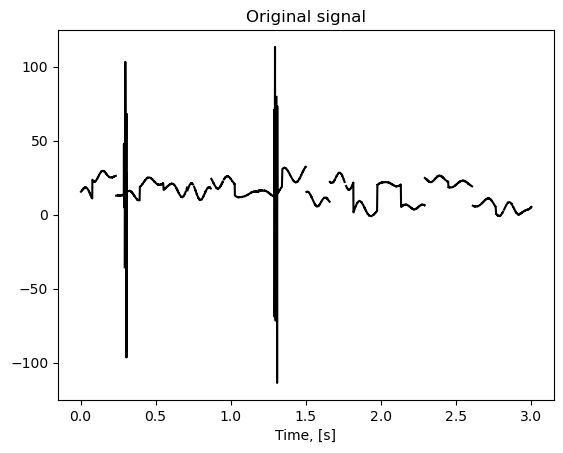

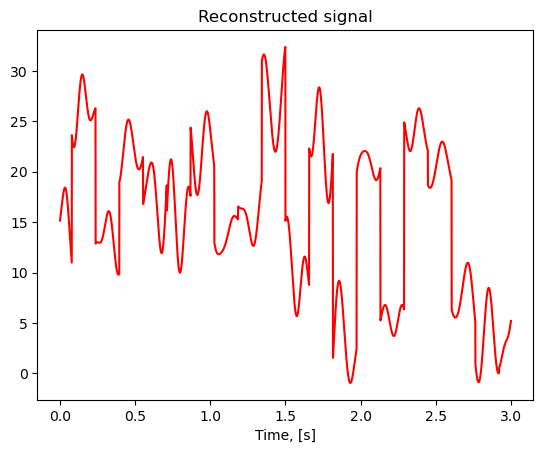

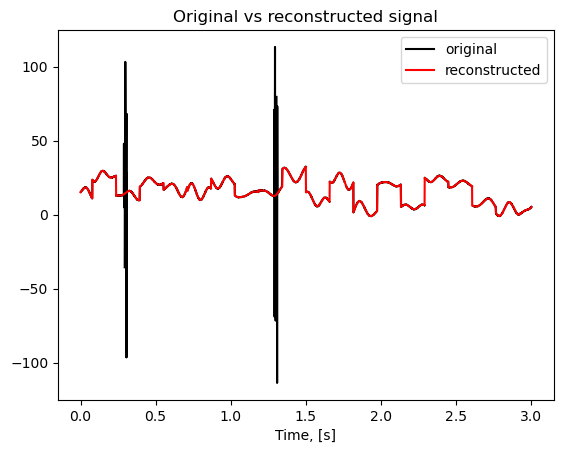

In [52]:
# import data and inspect them

data = sio.loadmat(r'C:\Users\GIANNI\Desktop\DSP applications on Matlab and Python\Section 8_Resampling_interpolating_extrapolating\sigprocMXC_resampling\resample_codeChallenge')
keys = data.keys()
print(keys)

# save keys
time = data['time'].flatten()
signal = data['signal'].flatten()
origT = data['origT'].flatten()
origS = data['origS'].flatten()
srateF = 1/np.mean(np.diff(origT))

# print some variables
print(len(time), len(signal), len(origT), len(origS), srateF)


# plot signal to manipulate
plt.figure()
plt.title('Original signal')
plt.plot(time, signal, 'k')
#plt.axhline(y=0, color='g', linestyle='-', linewidth=2)
plt.xlabel('Time, [s]')
plt.show()

# plot final signal and time vector
plt.figure()
plt.title('Reconstructed signal')
plt.plot(origT, origS, 'r')
plt.xlabel('Time, [s]')
plt.show()

# plot original vs reconstructed signal
plt.figure()
plt.title('Original vs reconstructed signal')
plt.plot(time, signal, 'k', label = 'original')
plt.plot(origT, origS, 'r', label = 'reconstructed')
plt.xlabel('Time, [s]')
plt.legend()
plt.show()



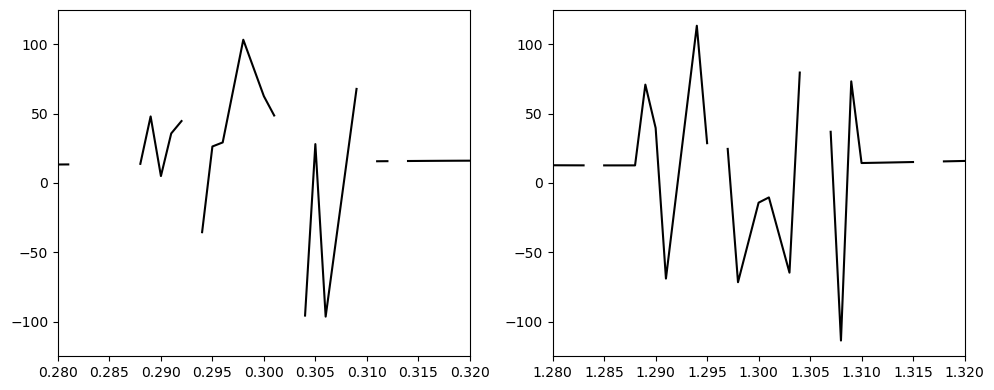

In [53]:
# let's zoom in into outliers regions...

fig, ax = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# First subplot
ax[0].plot(time, signal, 'k')
ax[0].set_xlim(0.28, 0.32)

# Second subplot
ax[1].plot(time, signal, 'k')
ax[1].set_xlim(1.28, 1.32)

# Show plot
plt.tight_layout()
plt.show()

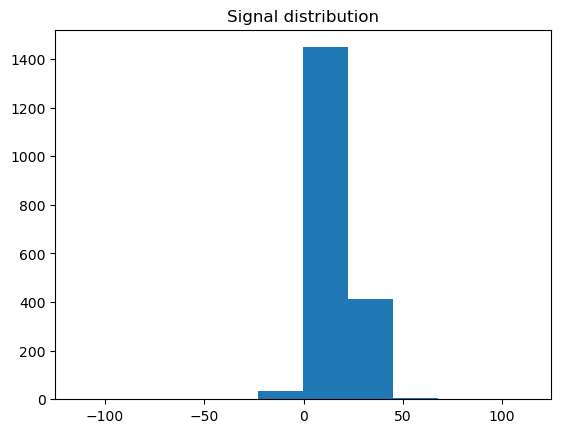

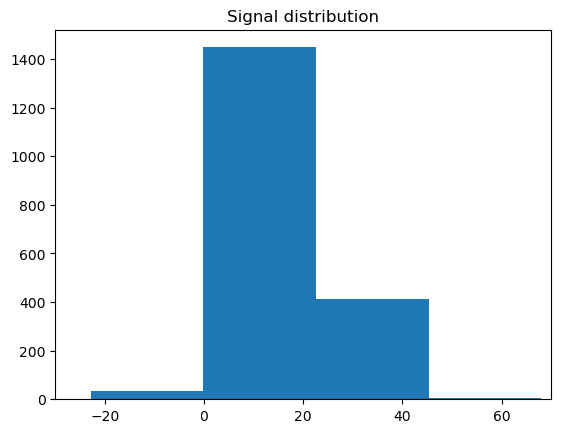

In [54]:
# I have two options to get rid of these outliers. Either I simply remove data points in outliers range, or I plot a gaussian distribution to identify 
# outliers. I would go with the first one, since I know exactly where outliers are. But let's plot an histogram anywway.

plt.figure()
plt.title('Signal distribution')
plt.hist(signal)
plt.show()

# zoom in...
plt.figure()
plt.title('Signal distribution')
plt.hist(signal)
plt.xlim([-30,70])
plt.show()



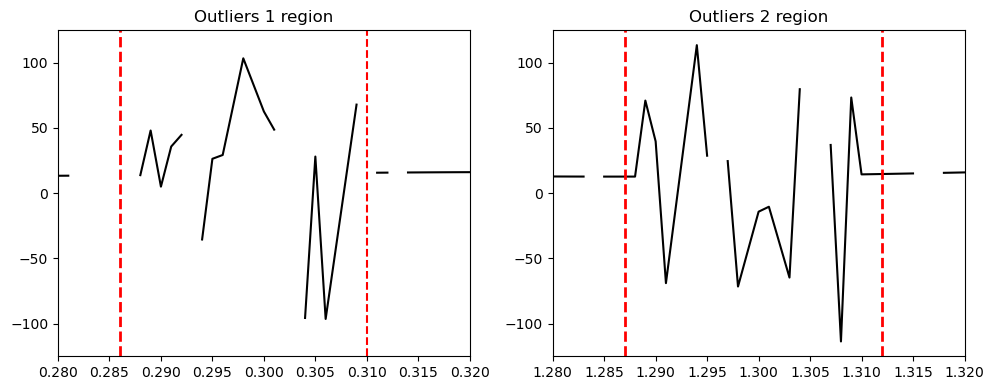

In [55]:
# now let's identify clear range for outliers

fig, ax = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# First subplot
ax[0].plot(time, signal, 'k')
ax[0].set_title('Outliers 1 region')
ax[0].axvline(x=0.286, color='red', linestyle='--', linewidth=2)
ax[0].axvline(x=0.31, color='red', linestyle='--')
ax[0].set_xlim(0.28, 0.32)

# Second subplot
ax[1].plot(time, signal, 'k')
ax[1].set_title('Outliers 2 region')
ax[1].axvline(x=1.287, color='red', linestyle='--', linewidth=2)
ax[1].axvline(x=1.312, color='red', linestyle='--', linewidth=2)
ax[1].set_xlim(1.28, 1.32)

# Show plot
plt.tight_layout()
plt.show()


2360 2360


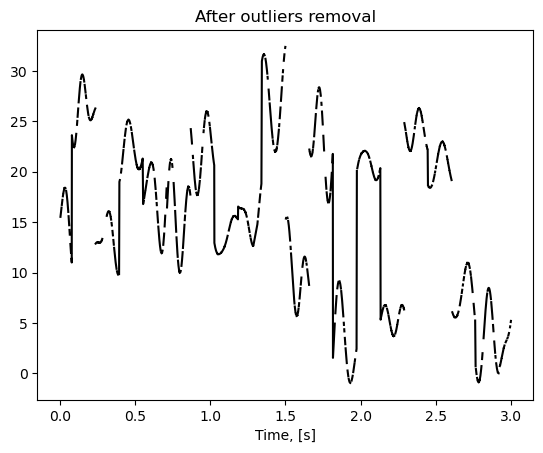

In [56]:
# it looks good. Now let's replace these data with NaN values

# remove outliers
indices1 = ~((time >= 0.286) & (time <= 0.31))
indices2 = ~((time >= 1.287) & (time <= 1.312))

newsig =  signal[indices1 & indices2]
newtime = time[indices1 & indices2]

print(len(newsig), len(newtime))

# plot 
plt.figure()
plt.title('After outliers removal')
plt.plot(newtime, newsig, 'k')
plt.xlabel('Time, [s]')
plt.show()

1882 1882


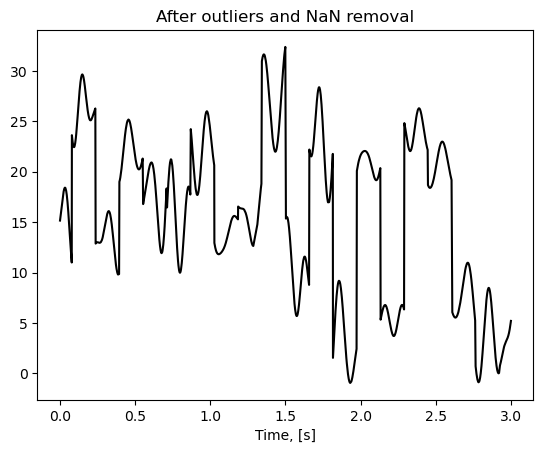

In [57]:
# eliminate NaN values from newtime and newsig

mask = ~np.isnan(newsig)

newtime = newtime[mask]
newsig = newsig[mask]

print(len(newtime), len(newsig))

# plot
plt.figure()
plt.title('After outliers and NaN removal')
plt.plot(newtime, newsig, 'k')
plt.xlabel('Time, [s]')
plt.show()



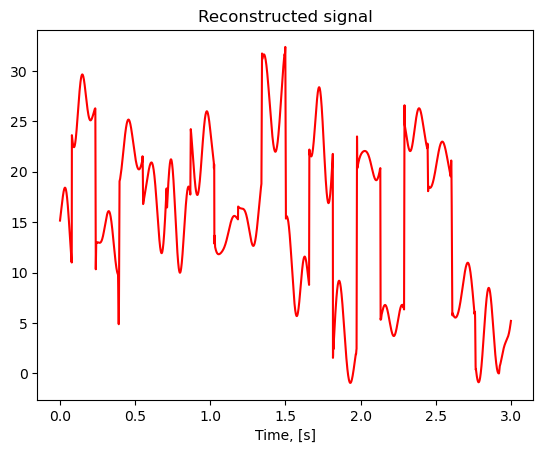

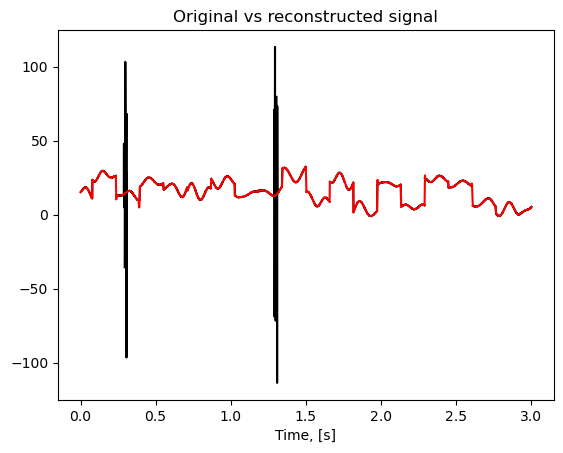

In [59]:
# Great! Now you can perform interpolation
# Notes: scipy interp1d function will not work if you have NaN values

tv = np.arange(0, len(origT)/srateF, 1/srateF)
interp_func = scipy.interpolate.interp1d(newtime, newsig, kind='cubic', fill_value="extrapolate")
final_signal = interp_func(tv)

# plot
plt.figure()
plt.title('Reconstructed signal')
plt.plot(tv, final_signal, 'r')
plt.xlabel('Time, [s]')
plt.show()


# plot
plt.figure()
plt.title('Original vs reconstructed signal')
plt.plot(time, signal, 'k', label = 'Original signal')
plt.plot(tv, final_signal, 'r', label = 'Reconstructed signal')
plt.xlabel('Time, [s]')
plt.show()

